# Analyzing IPL data from 2008 to 2020.



### I will be using 13 years of IPL data and try to answer below 4 questions using descriptive and inferential analysis.
### We will see total matches played by each team and their winning percentage that will tell us which team have more winning percentage? 
### Which Stadium Hosted max number of matches? 
### How toss affects the outcome of the game? 
### In which IPL Season maximum no. of runs are scored?

In [9]:
#DATA ANALYSIS

import pandas as pd
import numpy as np

#DATA VISUALIZATION

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
matches = pd.read_csv(r"C:\Users\ANAND\Downloads\IPL Matches 2008-2020.csv")
deliveries = pd.read_csv(r"C:\Users\ANAND\Downloads\IPL Ball-by-Ball 2008-2020.csv.zip")

# Understanding data :

We have 2 files here

matches.csv : this file contains details about each match. 
    Which team played whom, on what day, which ground, winners, player of match, umpires , season, venue etc etc. 
    
deliveries.csv: this file contains details about each ball bowled in IPL history till 2020 season. 
    it contains all the details related to each delivery. How many runs were score, who score the run, 
    bowlers name, runs score, extra runs, fall of wicket, fielder, season, innings etc.

In [11]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [13]:
matches.shape

(816, 17)

In [16]:
matches.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [17]:
#Adding a Season Column to matches dataset using data time object
matches['date'] = pd.to_datetime(matches.date)
matches['Season']= matches.date.dt.year
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [12]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [19]:
deliveries.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

# DATA CLEANING

In [20]:
#finding null values in City column
matches[matches['city'].isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi,2014
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary,2014
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni,2014
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi,2014
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth,2014
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni,2014
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi,2014
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus,2014
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni,2014


In [21]:
#Filling null cities with respective venue 
matches.loc[matches.venue =="Sharjah Cricket Stadium" , 'city'] = 'Sharjah'

In [22]:
#Filling null cities with respective city 
matches.loc[matches['city'].isna(), 'city'] = 'Dubai' 

In [23]:
#Handling null values in winner column
matches.loc[matches.winner.isna(),'winner'] = 'No_Winner'

In [24]:
#Handling null values in player_of_match column
matches.loc[matches.player_of_match.isna(), 'player_of_match'] = "No_player_of_the_Match"

In [25]:
matches.loc[matches['result'].isna() , 'winner'] = 'No winner'

In [26]:
#Now we will replace team name that are mentioned wrong
matches.replace('Rising Pune Supergiant' , 'Rising Pune Supergiants' , inplace = True)

In [27]:
matches.replace('Rising Pune Supergiants' , 'Pune Warriors' , inplace = True)

In [29]:
matches.replace('Delhi Capitals' , 'Delhi Daredevils' , inplace = True)

In [30]:
matches.team1.value_counts()

Royal Challengers Bangalore    108
Delhi Daredevils               102
Mumbai Indians                  97
Kolkata Knight Riders           95
Chennai Super Kings             94
Kings XI Punjab                 92
Rajasthan Royals                70
Sunrisers Hyderabad             59
Deccan Chargers                 39
Pune Warriors                   37
Gujarat Lions                   16
Kochi Tuskers Kerala             7
Name: team1, dtype: int64

In [31]:
#Now we will drop method column bcz it have many null values and we can ignore it.
matches.drop('method', axis=1, inplace=True)

In [32]:
#Here we handle null values in result , result_margin & eliminator column
matches.loc[matches['result'].isna() , 'result'] = 'No Result'

In [33]:
matches.loc[matches['result_margin'].isna(), 'result_margin'] = 'No Margin'

In [34]:
matches.loc[matches['eliminator'].isna(), 'eliminator'] = 'N'

NOW OUR DATA IS CLEANED , WE REMOVED THE NAN VALUES THAT CAN EFFECT OUR ANALYSIS

# EDA
# MATCHES PLAYED VS WIN BY EACH TEAM??

In [35]:
# Here we will find various features of each team like total matches , winned matches and percentage
matches_played = pd.concat([matches['team1'],matches['team2']], axis=0)

In [36]:
matches_played = matches_played.value_counts().reset_index()

In [37]:
matches_played.columns =['Teams', 'Total Matches Played']

In [38]:
matches_played['winner'] = matches['winner'].value_counts().reset_index()['winner']

In [39]:
matches_played['winner_percentage'] = matches_played['winner']/matches_played['Total Matches Played']*100

In [40]:
matches_played

,Teams,Total Matches Played,winner,winner_percentage
0,Mumbai Indians,203,120,59.113300
1,Royal Challengers Bangalore,195,106,54.358974
2,Delhi Daredevils,194,99,51.030928
3,Kolkata Knight Riders,192,91,47.395833
4,Kings XI Punjab,190,88,46.315789
5,Chennai Super Kings,178,86,48.314607
6,Rajasthan Royals,161,81,50.310559
7,Sunrisers Hyderabad,124,66,53.225806
8,Pune Warriors,76,29,38.157895
9,Deccan Chargers,75,27,36.000000


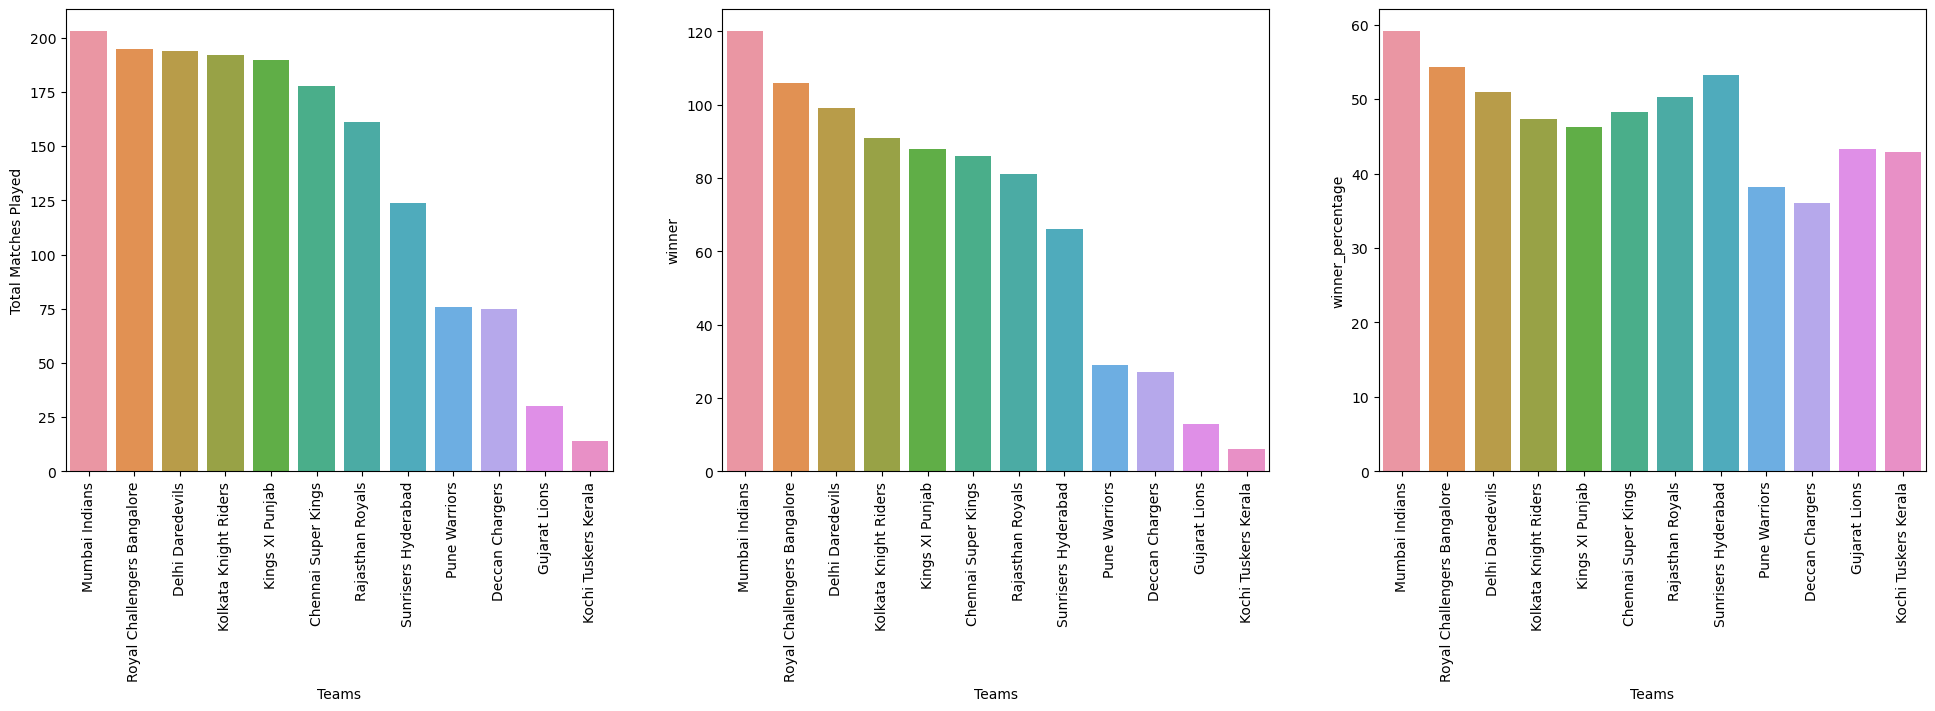

In [53]:

fig,axes = plt.subplots(nrows=1 , ncols=3, figsize=(24,6))

#chart for team vs total matches played
sns.barplot(x='Teams',y='Total Matches Played', data=matches_played, ax =axes[0]).set_xticklabels(
    matches_played['Teams'], rotation = 90)

#chart for team vs matches won
sns.barplot(x='Teams',y='winner', data=matches_played, ax =axes[1]).set_xticklabels(
    matches_played['Teams'], rotation = 90)


#chart for team vs winning percentage
sns.barplot(x='Teams',y='winner_percentage' , data=matches_played, ax =axes[2]).set_xticklabels(
    matches_played['Teams'], rotation = 90);#chart for team vs winning percentage

From here we can conclude that MUMBAI INDIANS have won maximum no. of matches and their winning percentage is also highest. so we can say that MUMBAI INDIANS is the most succesful team of IPL

# Which Stadium host maximum matches ?

In [54]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,Season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008


In [55]:
#finding no. of matches played at a venue

stadium_matches = matches['venue'].value_counts().reset_index().sort_values(by ='venue' , ascending=False)

In [56]:
#giving column names in stadium_matches dataframe
stadium_matches.columns = ['Stadium' , 'Total Matches'] #giving column names in stadium_matches dataframe

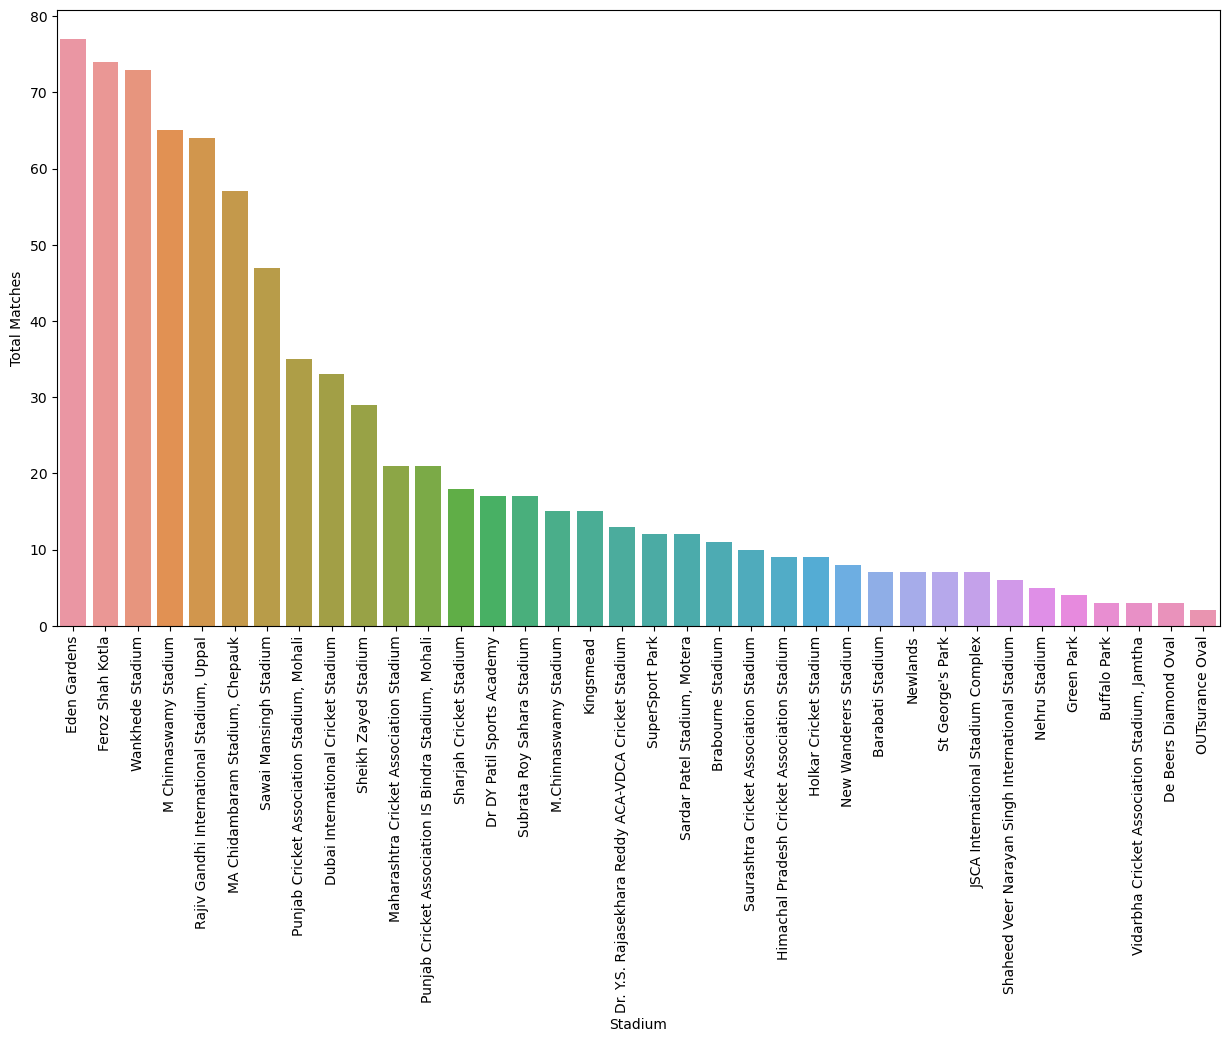

In [57]:
fig, axes = plt.subplots(figsize=(15,8))#plotting stadium vs total matches chart
sns.barplot(x='Stadium', y='Total Matches', data=stadium_matches
           ).set_xticklabels(stadium_matches['Stadium'],rotation=90);

FROM HERE WE CAN SAY THAT EDEN GARDENS HOSTED MAXIMUM NO. OF MATCHES

# NOW WE WILL SEE HOW TOSS EFFECTS THE RESULT OF A MATCH

In [59]:
#FOR THIS WE WILL ADD A NEW COLUMN TOSS_EFFECT IN MATCHES DATASET AND WE WILL ASSIGN ITS VALUE TO 0 . 
#IF A TOSS WINNING TEAM WON THE MATCH THEN WE CHANGE ITS VALUE TO 1

In [62]:
matches['toss_effect'] = 0

for i in matches.index:
    if matches.toss_winner[i] == matches.winner[i]:
        matches.toss_effect[i] = 1
matches.head() 

C:\Users\ANAND\AppData\Local\Temp\ipykernel_10784\1935019743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches.toss_effect[i] = 1


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,Season,toss_effect
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008,0
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008,1
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008,0
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008,0
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008,0


In [63]:
#NOW WE WILL SEE EFFECT ON TOSS IN EACH SEASON

In [65]:
win = matches.groupby(['Season'])['toss_effect'].sum()

#calculate total number of games in each season
total_matches = matches.groupby('Season')['Season'].count()

#percentage of matches won by toss winning team
toss_winner_ratio = np.round((win/total_matches) * 100, decimals = 1).reset_index()

#assigning column names in new dataframe
toss_winner_ratio.columns= ['Season' ,'Percentage']#assigning column names in new dataframe

In [66]:
toss_winner_ratio

,Season,Percentage
0,2008,48.3
1,2009,57.9
2,2010,51.7
3,2011,52.1
4,2012,44.6
5,2013,47.4
6,2014,50.0
7,2015,47.5
8,2016,56.7
9,2017,57.6


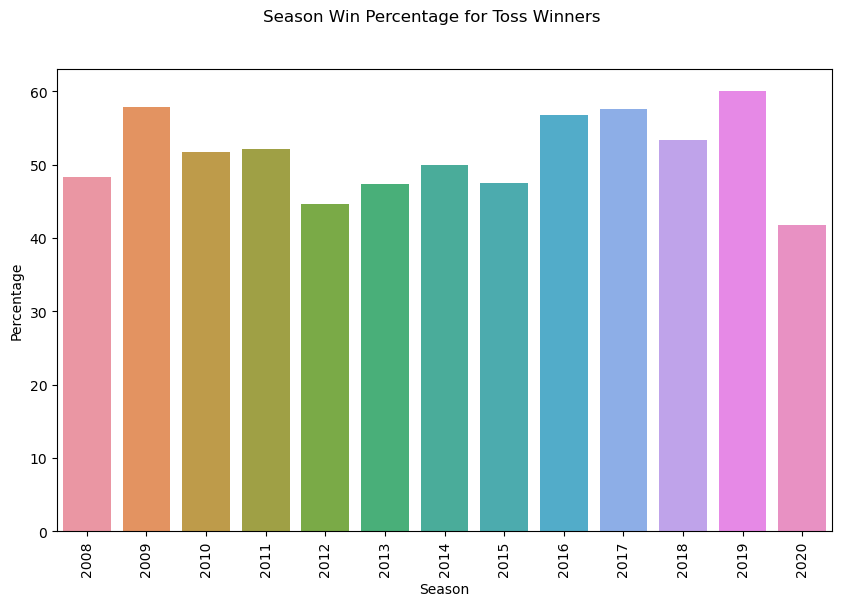

In [68]:
fig,axes = plt.subplots(figsize=(10,6)) 

 # plotting season vs season win % chart 
fig.suptitle('Season Win Percentage for Toss Winners')
sns.barplot(x='Season',y='Percentage', data=toss_winner_ratio).set_xticklabels(
    toss_winner_ratio['Season'], rotation = 90);

# FROM VIEWING THE ABOVE DATA WE CAN CONCLUDE THAT THEIR IS NOT MUCH EFFECT OF TOSS AS IN IN MOST SEASONS IT IS AROUND 50%

In [69]:
#NOW LETS SEE THE PERFORMANCE OF A TEAM AFTER WINNING TOSS

In [70]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,Season,toss_effect
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008,0
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008,1
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008,0
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008,0
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008,0


In [71]:
#LETS COUNT THE TOSS WINS BY EACH TEAM

toss_wins = matches.groupby('toss_winner')['toss_winner'].count()

In [72]:
toss_wins

toss_winner
Chennai Super Kings             97
Deccan Chargers                 43
Delhi Daredevils               100
Gujarat Lions                   15
Kings XI Punjab                 85
Kochi Tuskers Kerala             8
Kolkata Knight Riders           98
Mumbai Indians                 106
Pune Warriors                   33
Rajasthan Royals                87
Royal Challengers Bangalore     87
Sunrisers Hyderabad             57
Name: toss_winner, dtype: int64

In [73]:
#calculating matches won by toss winning team

toss_winner_matches = matches.groupby('toss_winner')['toss_effect'].sum() 

In [74]:
toss_winner_matches

toss_winner
Chennai Super Kings            61
Deccan Chargers                19
Delhi Daredevils               45
Gujarat Lions                  10
Kings XI Punjab                36
Kochi Tuskers Kerala            4
Kolkata Knight Riders          55
Mumbai Indians                 61
Pune Warriors                  11
Rajasthan Royals               44
Royal Challengers Bangalore    43
Sunrisers Hyderabad            29
Name: toss_effect, dtype: int64

In [75]:
#now we find the win percentage of a toss winning team

winner_percentage = np.round((toss_winner_matches/toss_wins)*100 , decimals=2).reset_index()

In [76]:
#Assing column names to our dataframe

winner_percentage.columns = ['Team' , 'Percentage'] #Assing column names to our dataframe

In [77]:
 #sorting our data 

winner_percentage.sort_values(by='Team' )

,Team,Percentage
0,Chennai Super Kings,62.89
1,Deccan Chargers,44.19
2,Delhi Daredevils,45.00
3,Gujarat Lions,66.67
4,Kings XI Punjab,42.35
5,Kochi Tuskers Kerala,50.00
6,Kolkata Knight Riders,56.12
7,Mumbai Indians,57.55
8,Pune Warriors,33.33
9,Rajasthan Royals,50.57


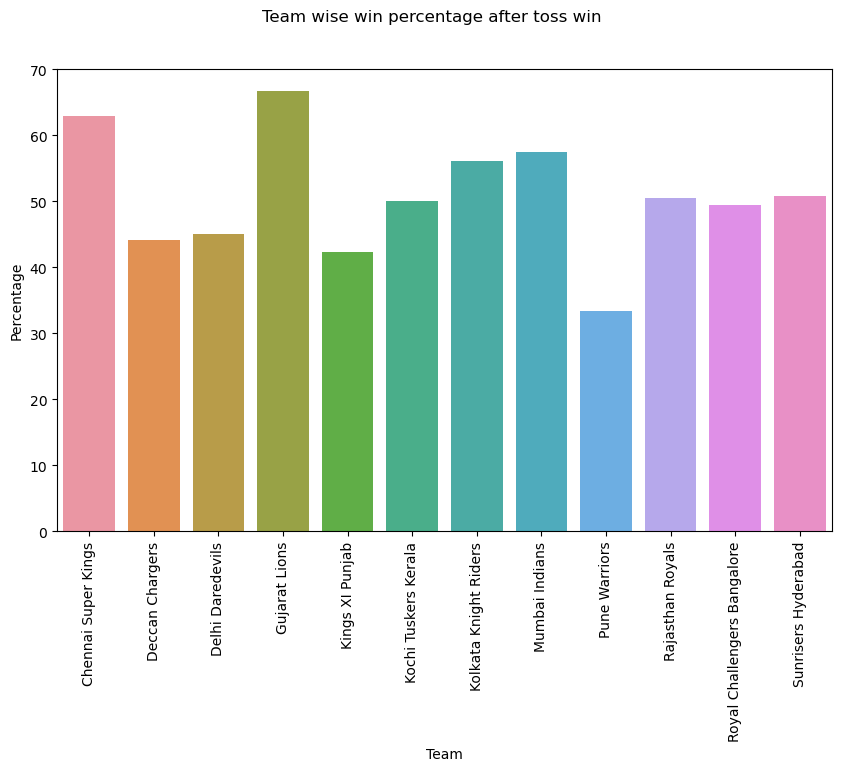

In [80]:
fig,axes = plt.subplots(figsize=(10,6)) #plotting graph for team wise win %
fig.suptitle('Team wise win percentage after toss win')
sns.barplot(x='Team',y='Percentage', data=winner_percentage).set_xticklabels(
    winner_percentage['Team'], rotation = 90);

Clearly teams like Chennai Super Kings, Kolkata Knight Riders and Mumbai Indians have better win percentage when they win toss. This gives them an edge over other teams in knockout stages where win or loss can eliminate other team and make you finalist or even champian. Gujarat Loins is clearly a leader in this category but given it has played only 2 seasons we are choosing to ignore this franchise.

# In which IPL Season maximum no. of runs are scored?

In [81]:
#for this we need to use deliveries dataset

deliveries.head() 

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [82]:
#here we merge both columns

runs = matches.merge(deliveries,  how = 'left')

In [83]:
#now we calculate total runs in a season

total_runs_season = runs.groupby(['Season'])['total_runs'].sum().reset_index()

In [84]:
matches_season = matches.groupby(['Season']).count()["id"].reset_index()

In [85]:
# here we renamed our column name to matches

matches_season.rename(columns={'id':'matches'},inplace=True) 

In [86]:
matches_season["total_runs"] = total_runs_season["total_runs"]

In [87]:
#here we calculated average no. of runs in a season

matches_season["average_runs_per_match"] = matches_season["total_runs"]/ matches_season['matches'] 

In [88]:
#here we sorted  our data

matches_season.sort_values(by='total_runs' , ascending=False)

,Season,matches,total_runs,average_runs_per_match
5,2013,76,22541,296.592105
4,2012,74,22453,303.418919
3,2011,73,21154,289.780822
10,2018,60,19901,331.683333
11,2019,60,19400,323.333333
12,2020,60,19352,322.533333
6,2014,60,18909,315.150000
2,2010,60,18864,314.400000
8,2016,60,18862,314.366667
9,2017,59,18769,318.118644


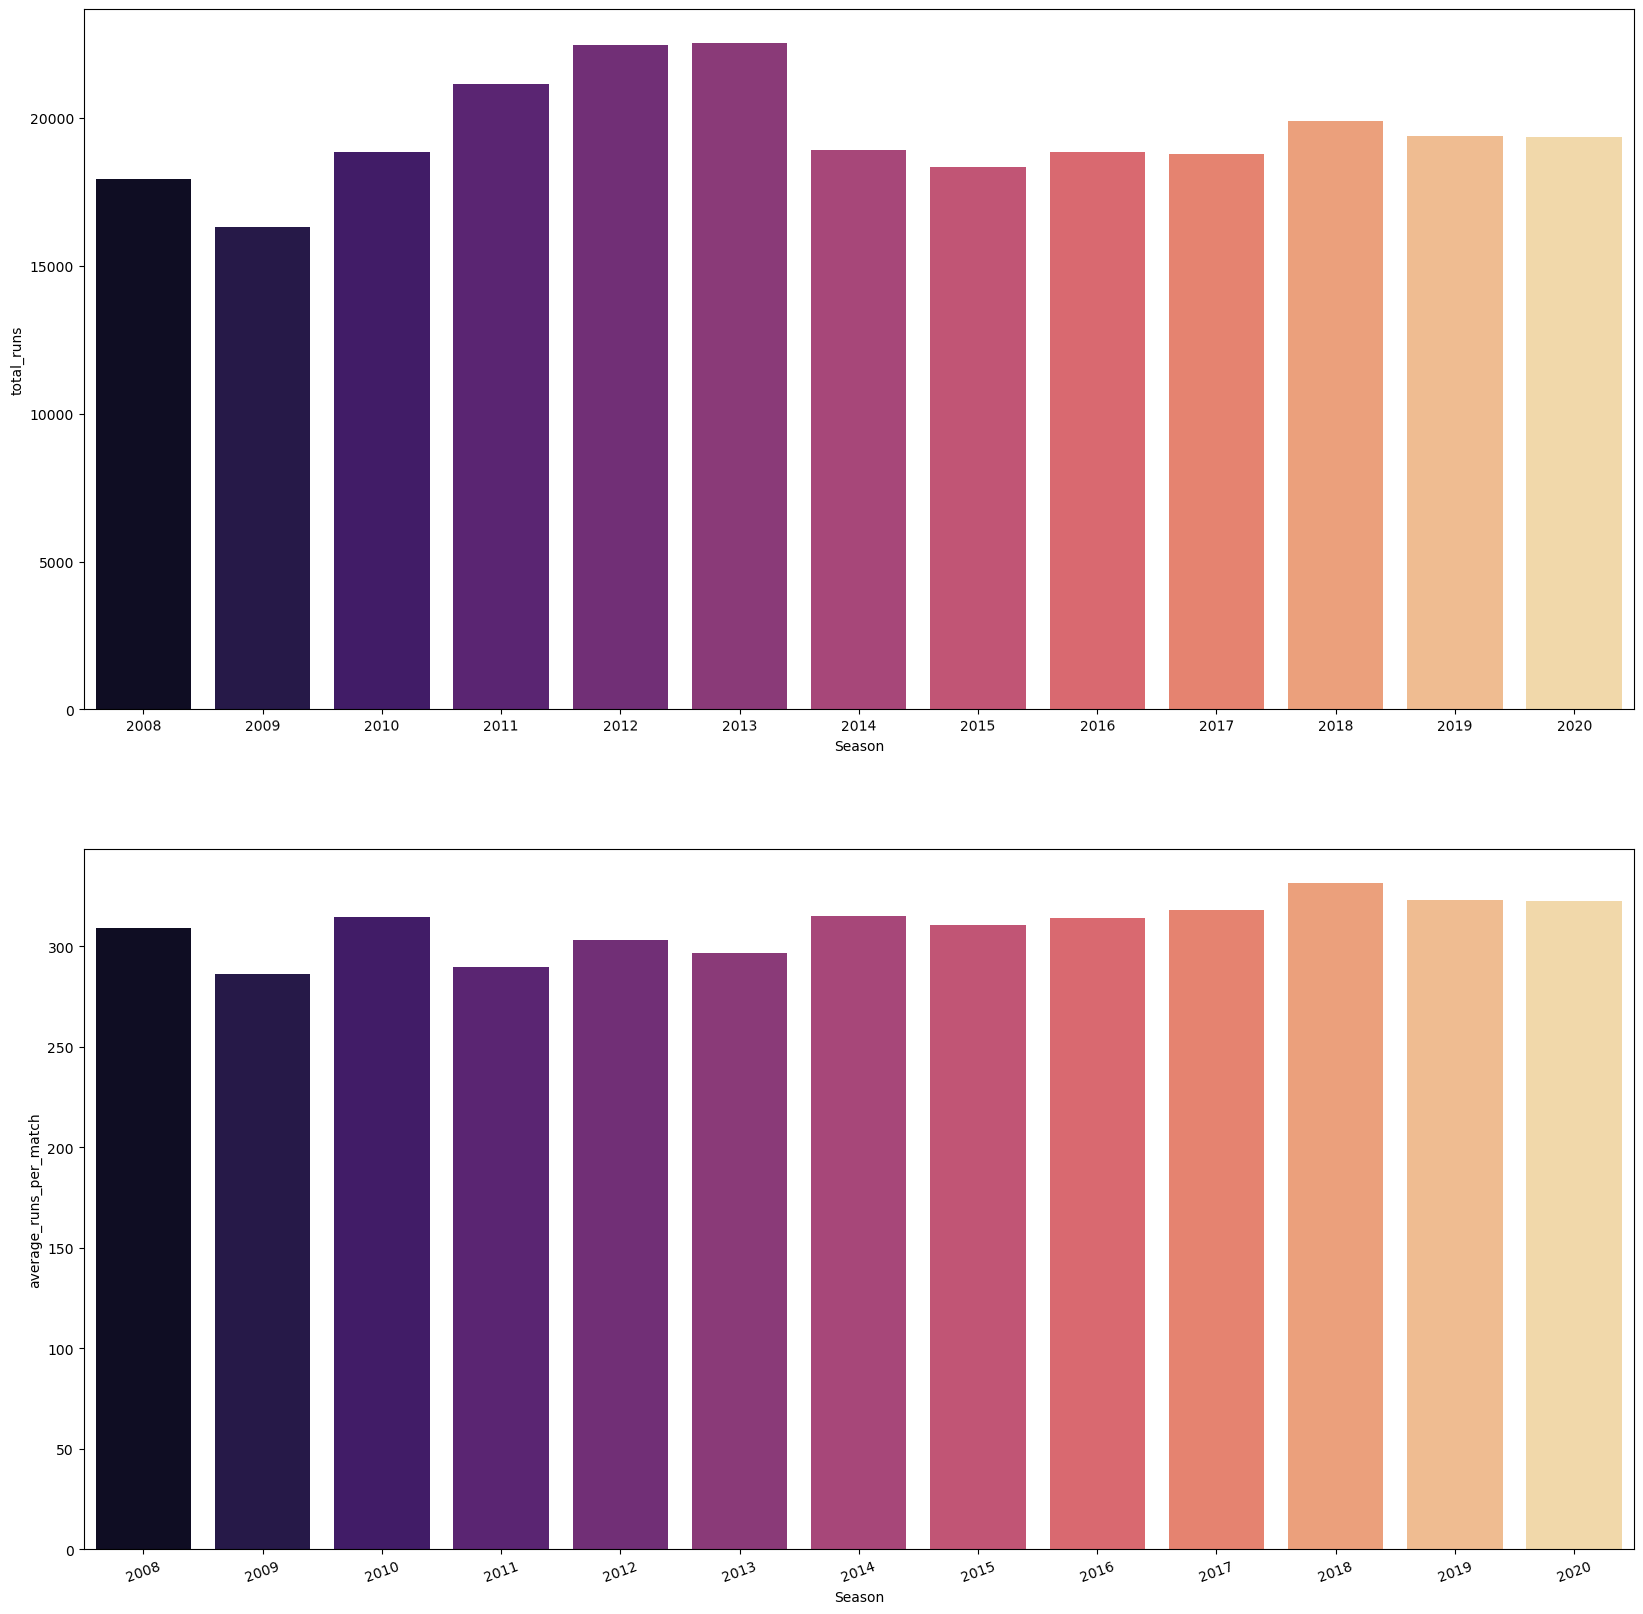

In [89]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(20, 20))


#chart for season vs total runs scored
sns.barplot(x='Season',y='total_runs',data=matches_season, ax=axes[0],palette='magma').set_xticklabels(
    matches_season["Season"],rotation=1)


#chart for season vs average runs scored in a season
sns.barplot(x='Season',y='average_runs_per_match',data=matches_season, ax=axes[1],palette='magma').set_xticklabels(
    matches_season["Season"],rotation=20); 

# From here we can say that in Season 2013 maximum no. of runs are scored with an average of 296.5 runs per match.
 